In [103]:
from emoji_playground import *
from PIL import Image
import matplotlib.pyplot as plt
import requests

def show(img , cmap = "gray"):
    plt.imshow(img , cmap)
    plt.axis("off")

In [104]:
current_emoji = current_emoji
current_filter_name = current_filter_name
emoji_code = "-".join(f"{ord(c):x}" for c in current_emoji).upper()
url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/618x618/{emoji_code}.png"
emoji_data = Image.open(requests.get(url, stream=True).raw)
emoji_data = np.array(emoji_data.convert("RGBA"))


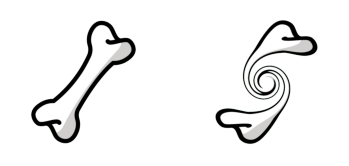

In [105]:
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = filter_names[current_filter_name](emoji_data)
show(filtered_image)

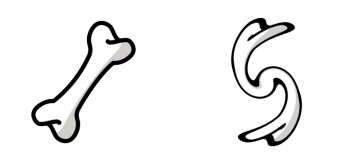

In [106]:
def swirl_filter(my_array: np.array) -> np.array:
    return swirl(my_array, rotation = 0, strength = 5, radius = 800)

plt.subplot(1,2,1)
show(emoji_data)


plt.subplot(1,2,2)
filtered_image = swirl_filter(emoji_data)
show(filtered_image)

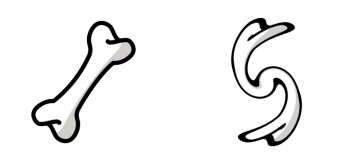

In [107]:
def swirl_filter(my_array: np.array) -> np.array:
    return swirl(my_array, rotation = 0, strength = 5, radius = 800)

plt.subplot(1,2,1)
show(emoji_data)


plt.subplot(1,2,2)
filtered_image = swirl_filter(emoji_data)
show(filtered_image)

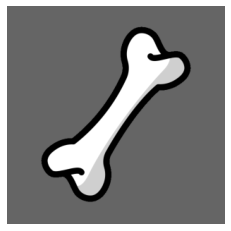

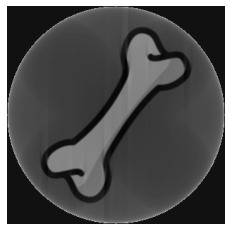

In [124]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import radon, rescale
from skimage.color import rgb2gray


image = rgb2gray(emoji_data[:,:,:3]) # remove alpha channel and convert to gray
image = rescale(image, scale=0.5, mode='reflect', channel_axis=None)

show(image)
plt.show()
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]

# plt.imshow(sinogram, cmap=plt.cm.Greys_r,
#            extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
#            aspect='auto')
plt.show()

from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram[2:], theta=theta, filter_name='shepp-logan')
show(reconstruction_fbp)

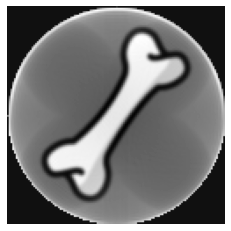

In [98]:
from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='cosine')
show(reconstruction_fbp)